In [1]:
# Load data from MySQL to perform exploratory data analysis
import settings
import mysql.connector
import pandas as pd
import time

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


db_connection = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="",
    database="TwitterDB",
    charset = 'utf8'
)

Black Lives Matters Negative Tweets Monitor: 
  RT @Timcast: Facebook is evil  RT @Timcast: Facebook is evil
  RT @TimMurtaugh: This is outrageous.  RT @TimMurtaugh: This is outrageous.
  RT @Timcast: Fucking regulate these companies already

Could you imagine your phone disconnecting you every time you mentioned something th  RT @Timcast: Fucking regulate these companies already

Could you imagine your phone disconnecting you every time you mentioned something th
  This should be illegal  This should be illegal
  RT @follysurfangel1: @BreitbartNews @DTOMnews @Facebook you are disgusting removing an individual who helped defend Benghazi. U.S. Marine C  RT @follysurfangel1: @BreitbartNews @DTOMnews @Facebook you are disgusting removing an individual who helped defend Benghazi. U.S. Marine C
  Wondering what will happen when it's proven that corrupt #SocialMedia and #FakeNewsMediaClowns pushed fake virus in https://t.co/LVLWusrOua  Wondering what will happen when it's proven that corrupt

  RT @SohrabAhmari: This is the story Facebook doesnt want you to read. Its about graft in the Biden dynasty. Itd be terrible if yall ret  RT @SohrabAhmari: This is the story Facebook doesnt want you to read. Its about graft in the Biden dynasty. Itd be terrible if yall ret
  RT @SohrabAhmari: This is the story Facebook doesnt want you to read. Its about graft in the Biden dynasty. Itd be terrible if yall ret  RT @SohrabAhmari: This is the story Facebook doesnt want you to read. Its about graft in the Biden dynasty. Itd be terrible if yall ret
  RT @SohrabAhmari: This is the story Facebook doesnt want you to read. Its about graft in the Biden dynasty. Itd be terrible if yall ret  RT @SohrabAhmari: This is the story Facebook doesnt want you to read. Its about graft in the Biden dynasty. Itd be terrible if yall ret
  RT @Timcast: Fucking regulate these companies already

Could you imagine your phone disconnecting you every time you mentioned something th  RT @Timcast: Fucking regulate th

  We need to move these Pro China companies to a base in China. They do not belong in America.  We need to move these Pro China companies to a base in China. They do not belong in America.
  What? Facebook biased? That's almost as absurd as thinking twitter is biased and that #FakeNewsMedia is the https://t.co/JwW1r2KveX  What? Facebook biased? That's almost as absurd as thinking twitter is biased and that #FakeNewsMedia is the https://t.co/JwW1r2KveX
  RT @SohrabAhmari: This is the story Facebook doesnt want you to read. Its about graft in the Biden dynasty. Itd be terrible if yall ret  RT @SohrabAhmari: This is the story Facebook doesnt want you to read. Its about graft in the Biden dynasty. Itd be terrible if yall ret
  RT @Timcast: Fucking regulate these companies already

Could you imagine your phone disconnecting you every time you mentioned something th  RT @Timcast: Fucking regulate these companies already

Could you imagine your phone disconnecting you every time you mentioned

  RT @DailyCaller: This is insane. Twitter and Facebook are both censoring a story unflattering to the Democratic nominee for president. http  RT @DailyCaller: This is insane. Twitter and Facebook are both censoring a story unflattering to the Democratic nominee for president. http
  I would like to sue @twitter and @facebook for their blatant censorship and violation of @nypost rights protected u https://t.co/lNZrh4xQXY  I would like to sue @twitter and @facebook for their blatant censorship and violation of @nypost rights protected u https://t.co/lNZrh4xQXY
  RT @SohrabAhmari: This is the story Facebook doesnt want you to read. Its about graft in the Biden dynasty. Itd be terrible if yall ret  RT @SohrabAhmari: This is the story Facebook doesnt want you to read. Its about graft in the Biden dynasty. Itd be terrible if yall ret
  RT @DailyCaller: This is insane. Twitter and Facebook are both censoring a story unflattering to the Democratic nominee for president. http  RT @DailyCaller:

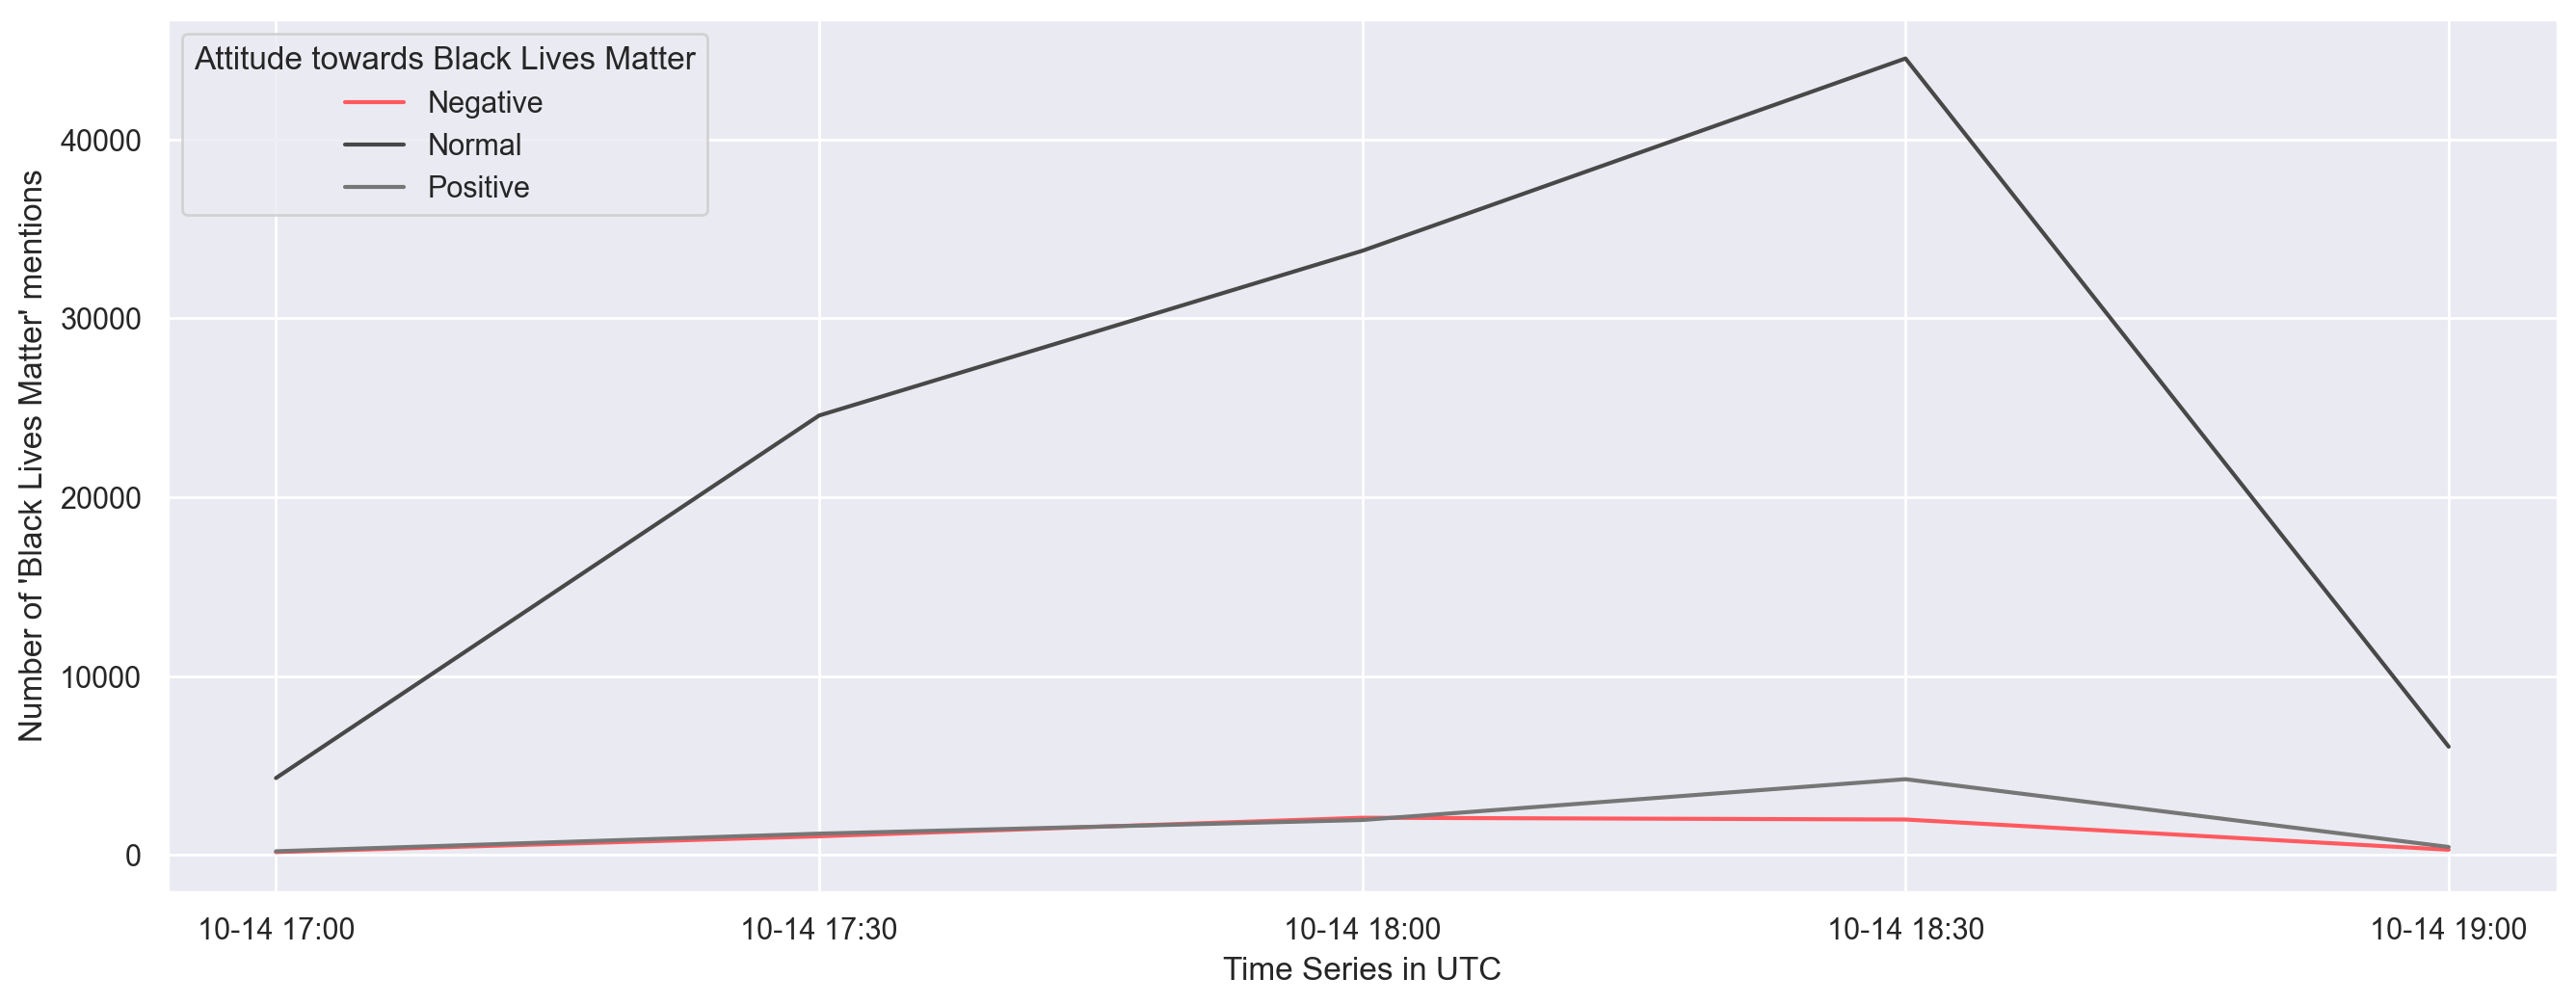

In [15]:
# Load data from MySQL
df = pd.read_sql('SELECT id_str, text, created_at, polarity, user_location FROM {}'.format(settings.TABLE_NAME), con=db_connection)
# UTC for date time at default
df['created_at'] = pd.to_datetime(df['created_at'])
print("Black Lives Matters Negative Tweets Monitor: ")
for index, tweets in df[df['polarity'] == -1].iterrows():
    print("  " +str(tweets[1]) + "  " + tweets[1])


# Clean and transform data to enable time series
result = df.groupby([pd.Grouper(key='created_at', freq='30min'), 'polarity']).count() \
        .unstack(fill_value=0).stack().reset_index()
result['created_at'] = pd.to_datetime(result['created_at']).apply(lambda x: x.strftime('%m-%d %H:%M'))


# Plot Line Chart for monitoring brand awareness on Twitter
mpl.rcParams['figure.dpi']= 200
plt.figure(figsize=(16, 6))
sns.set(style="darkgrid")
ax = sns.lineplot(x = "created_at" ,y="id_str", hue='polarity', data=result,\
                  palette=sns.color_palette(["#FF5A5F","#484848", "#767676"]))
ax.set(xlabel='Time Series in UTC', ylabel="Number of '{}' mentions".format(settings.TRACK_WORDS[0]))
plt.legend(title='Attitude towards Black Lives Matter', loc='upper left', labels=['Negative', 'Normal', 'Positive'])
sns.set(rc={"lines.linewidth": 1})
plt.show()

In [3]:
# Next step: find out geo-distribution of users
# Find where tweets come from according to their users' location
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="specify_your_app_name_here")
location = geolocator.geocode("Columbus, Oh")
print((location.latitude, location.longitude))
location.address

ConfigurationError: Using Nominatim with default or sample `user_agent` "specify_your_app_name_here" is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`.